<a href="https://colab.research.google.com/github/mafegomez-c/Laboratorio-fisica-moderna/blob/main/Codigo_proyecto_moderna_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

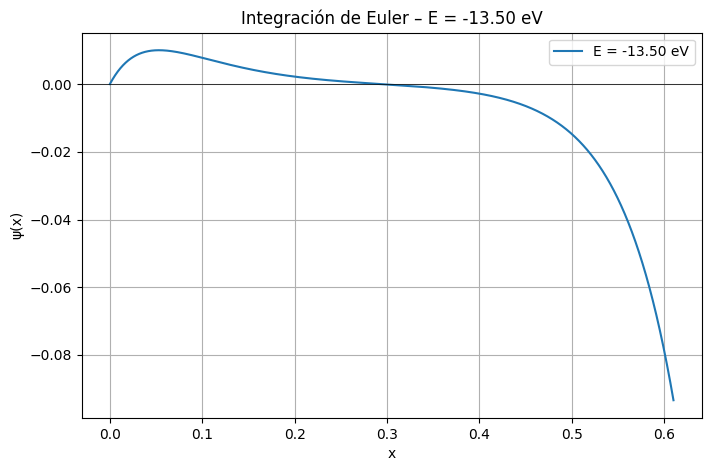

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


c = 26.24
d = 1.44
x_maximo = 0.61
N = 5000
psi0 = 0.0
dpsi0 = 0.5

def d2psi(x, psi, E):
    return -c * (E + d/(x + 1e-10)) * psi

def construir_psi(N, psi0, dpsi0, E):

    x = np.linspace(0, x_maximo, N)
    dx = x[1] - x[0]


    psi_vals = np.zeros(N)
    psi_vals[0] = psi0
    psi = psi0
    dpsi = dpsi0


    for i in range(1, N):

        psi_new = psi + dpsi * dx


        d2p = d2psi(x[i], psi, E)
        dpsi = dpsi + d2p * dx

        psi_vals[i] = psi_new
        psi = psi_new

    plt.figure(figsize=(8,5))
    plt.plot(x, psi_vals, label=f'E = {E:.2f} eV')
    plt.axhline(0, color='k', lw=0.5)
    plt.xlabel('x')
    plt.ylabel('ψ(x)')
    plt.title(f'Integración de Euler – E = {E:.2f} eV')
    plt.grid(True)
    plt.legend()
    plt.show()

construir_psi(N, psi0, dpsi0, -13.5)


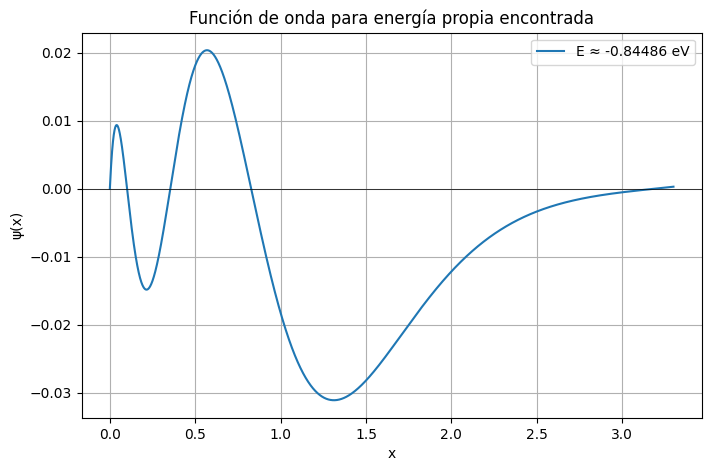

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constantes
c = 26.24
d = 1.44
x_maximo = 3.30
N = 5000
psi0 = 0.0
dpsi0 = 0.5
tolerancia = 1e-4


def d2psi(x, psi, E):
    return -c * (E + d / (x + 1e-10)) * psi


def construir_psi(E):
    x = np.linspace(0, x_maximo, N)
    dx = x[1] - x[0]
    psi_vals = np.zeros(N)
    psi_vals[0] = psi0
    psi = psi0
    dpsi = dpsi0

    for i in range(1, N):
        psi_new = psi + dpsi * dx
        d2p = d2psi(x[i], psi, E)
        dpsi += d2p * dx
        psi_vals[i] = psi_new
        psi = psi_new

    return psi_vals, x


def encontrar_energia(E_min, E_max):
    psi_min, _ = construir_psi(E_min)
    psi_max, _ = construir_psi(E_max)

    if psi_min[-1] * psi_max[-1] > 0:
        raise ValueError("No hay cambio de signo en psi(x_max), ajusta E_min y E_max.")

    while abs(E_max - E_min) > tolerancia:
        E_mid = (E_min + E_max) / 2
        psi_mid, _ = construir_psi(E_mid)

        if psi_mid[-1] * psi_min[-1] < 0:
            E_max = E_mid
        else:
            E_min = E_mid

    return (E_min + E_max) / 2


E_aproximado = encontrar_energia(-1, 2)
psi_final, x = construir_psi(E_aproximado)


plt.figure(figsize=(8,5))
plt.plot(x, psi_final, label=f'E ≈ {E_aproximado:.5f} eV')
plt.axhline(0, color='k', lw=0.5)
plt.xlabel('x')
plt.ylabel('ψ(x)')
plt.title('Función de onda para energía propia encontrada')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigh

hbar = 1.0545718e-34
m_e = 9.10938356e-31
e = 1.60217662e-19
epsilon_0 = 8.85418782e-12
k = 8.9875517923e9

x_min = 0.01e-10
x_max = 30e-10
num_points = 20000
x = np.linspace(x_min, x_max, num_points)

dx = x[1] - x[0]
U = -k * e**2 / (x + 1e-15)  # Añadido un pequeño valor a x
H = np.zeros((num_points, num_points))
for i in range(num_points):
    if i > 0:
        H[i, i - 1] = -hbar**2 / (2 * m_e * dx**2)
    if i < num_points - 1:
        H[i, i + 1] = -hbar**2 / (2 * m_e * dx**2)
    H[i, i] = 2 * hbar**2 / (2 * m_e * dx**2) + U[i]

energies, wavefunctions = eigh(H)
energies_eV = energies / e

print("Energías propias (primeros 4 estados):")
for i in range(4):
    print(f"Estado {i+1}: E = {energies_eV[i]:.4f} eV")

plt.figure(figsize=(10, 6))
for i in range(4):
    plt.plot(x * 1e10, wavefunctions[:, i], label=f"Estado {i+1}: E = {energies_eV[i]:.4f} eV")

plt.title("Funciones de onda para el átomo de hidrógeno")
plt.xlabel("x (Å)")
plt.ylabel("ψ(x)")
plt.legend()
plt.grid()
plt.show()